In [31]:
from model import DeepLabModel, DeepLab
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from PIL import Image
import numpy as np
import cv2
import params
from CentroidTracker import CentroidTracker, progressBar, showWindows, georeference
import time


from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

In [34]:
# Set basic variables
ct = CentroidTracker()

In [14]:
# def create__label_colormap():
#      return np.asarray([
#          [0, 0, 0],
#          [0, 192, 0],
#          [255, 192, 192],
#      ])

# def label_to_color_image(label):
#     """Adds color defined by the dataset colormap to the label.

#     Args:
#     label: A 2D array with integer type, storing the segmentation label.

#     Returns:
#     result: A 2D array with floating type. The element of the array
#       is the color indexed by the corresponding element in the input label
#       to the PASCAL color map.

#     Raises:
#     ValueError: If label is not of rank 2 or its value is larger than color
#       map maximum entry.
#     """
#     if label.ndim != 2:
#         raise ValueError('Expect 2-D input label')

#     colormap = create__label_colormap()

#     if np.max(label) >= len(colormap):
#         raise ValueError('label value too large.')

#     return colormap[label]

In [15]:
file = 'input/foto/cars.JPG'
image = Image.open(file)

In [17]:
print(image.format)
print(image.size)
print(image.mode)

JPEG
(396, 359)
RGB


In [20]:
image = Image.open('input/foto/cars.JPG').convert('L')

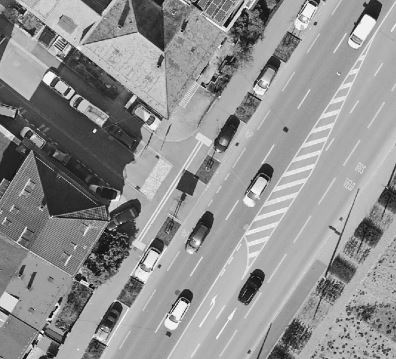

In [22]:
image

In [24]:
data = asarray(image)

In [25]:
data

array([[ 79,  89,  99, ..., 174, 165, 184],
       [107,  86,  82, ..., 159, 181, 205],
       [ 89,  83,  89, ..., 162, 208, 221],
       ...,
       [ 45,  82, 121, ..., 106, 155, 144],
       [130,  56,  46, ..., 139, 175, 170],
       [161, 176, 164, ..., 168, 179, 177]], dtype=uint8)

In [33]:
# apply threshold
thresh = threshold_otsu(data)
bw = closing(data > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
# to make the background transparent, pass the value of `bg_label`,
# and leave `bg_color` as `None` and `kind` as `overlay`
image_label_overlay = label2rgb(label_image, image=data, bg_label=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

AttributeError: module 'skimage.data' has no attribute 'shape'

In [13]:
original_im = Image.open(file)

In [15]:
cv2.imshow('img',im)

In [ ]:
# frame = Image.open(file)

# model = DeepLabModel('model/frozen_inference_graph_cars.pb')

# mask = model.run(frame)

#Image.fromarray(label_to_color_image(mask).astype(np.uint8)).save('output/foto/test1.png')

# plt.imshow(mask)
# Image.fromarray(label_to_color_image(mask).astype(np.uint8)).save('output/test99.png')

In [ ]:
prev_gray = cv2.cvtColor(np.uint8(frame), cv2.COLOR_RGB2GRAY)

In [ ]:
prev_gray

In [ ]:
plt.imshow(prev_gray)

In [ ]:
mask = np.zeros_like(frame)
mask2 = np.zeros_like(frame)

In [ ]:
mask2

In [ ]:
coord_pixel0_x, coord_pixel0_y, scale = georeference()

In [ ]:
# Start time
start = time.time()

In [ ]:
backSub = cv2.createBackgroundSubtractorKNN()

In [ ]:
# ----    BACKGROUND SUBTRACTION (BS)   -----//
# update the background model
fgMask = backSub.apply(prev_gray)
# optimization of elements
thresh = cv2.threshold(fgMask, params.threshold, 255, cv2.THRESH_BINARY)[1]
se0 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, se0)
kernel_dil = np.ones(params.kernel_dilatation, np.uint8)
thresh = cv2.dilate(thresh, kernel_dil, iterations=1)

se1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
se2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (41, 41))
opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, se1)
closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, se2)

plt.imshow(fgMask)

In [ ]:
im = cv2.imread('input/foto/cars.JPG')
gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
contours, hierarchy = cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[-2:]
idx =0 
for cnt in contours:
    idx += 1
    x,y,w,h = cv2.boundingRect(cnt)
    roi=im[y:y+h,x:x+w]
    cv2.imwrite(str(idx) + '.jpg', roi)
    cv2.rectangle(im,(x,y),(x+w,y+h),(200,0,0),2)
cv2.imshow('img',im)
cv2.waitKey(0)  

In [ ]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours = cv2.findContours(image=prev_gray, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
mask = np.zeros_like(frame)
# draw contours on the original image
contours = [x for x in contours if len(x) >= 30]
cv2.drawContours(image=mask, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2,
                 lineType=cv2.LINE_AA)

In [ ]:
plt.imshow(fgMask)

In [ ]:
# ------ Draw bounding boxes ----
rects = []
ROI_number = 0
for cntr in contours:
    x, y, w, h = cv2.boundingRect(cntr)
    if params.min_width < w < params.max_width and params.min_height < h < params.max_height:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
        ROI = mask[y:y + h, x:x + w]
        cv2.putText(mask, str(ROI_number), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255))
        rects.append([x, y, x + w, y + h])
        ROI_number += 1

In [ ]:
plt.imshow(prev_gray)

In [ ]:
# update centroid tracker using the computed set of bounding box rectangles
objects, life = ct.update(rects)

# build path in swiss coordinate system
if objects is not None:
    for (objectID, centroid) in objects.items():
        if life[objectID] > params.min_life:
            # draw both the ID of the object and the centroid of the object on the output frame
            text = "ID {}".format(objectID)
            x = centroid[0]
            y = centroid[1]
            cv2.putText(frame, text, (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
            cv2.circle(frame, (x, y), 4, (0, 255, 0), -1)
            if objectID in path.keys():
                path[objectID].append((coord_pixel0_x+(x*scale), coord_pixel0_y-(y*scale)))
            else:
                path[objectID] = [(coord_pixel0_x+(x*scale), coord_pixel0_y-(y*scale))]

In [ ]:
plt.imshow(fgMask)